## 1) Problem Statement :- Predicting Diabetes using Logistic Regression

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd

## 2) Loade dataset :-

In [2]:
data=pd.read_csv(r"C:\Users\jadha\Downloads\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3) Data Preprocessing :-

In [3]:
data.shape

(768, 9)

 The 'diabetes' dataset contains 768 rows and 9 columns.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

For our logistic regression Model, we're using the following columns:
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
 - Target variable: Outcome (Oure target variable is 0 & 1)


## 4) Sampling :- Divide data into Train & Test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train,data_test = train_test_split(data,test_size=.2)

#### Define the data into x & y 

In [8]:
data_train_x = data_train.iloc[:,0:-1]
data_train_y = data_train.iloc[:,-1]

In [9]:
data_test_x = data_test.iloc[:,0:-1]
data_test_y = data_test.iloc[:,-1]

## 5) Model Building:-

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr=LogisticRegression()

In [12]:
lr.fit(data_train_x,data_train_y)

C:\Users\jadha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediction

In [13]:
pred = lr.predict(data_test_x)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(data_test_y,pred)
cm

array([[84, 17],
       [21, 32]], dtype=int64)

## Model Evaluation :-

### Evaluation parameters in Linear Regression model are :-
 a) Accuracy.
 b) Tpr/Recall.
 c) Precission.
 d) F1 Ratio.
 e) Auroc Curve.

In [16]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data_test_y,pred)*100

75.32467532467533

In [17]:
# tpr/Recall
from sklearn.metrics import recall_score
recall_score(data_test_y,pred)*100

60.37735849056604

In [18]:
# precission
from sklearn.metrics import precision_score
precision_score(data_test_y,pred)*100


65.3061224489796

In [19]:
# f1 ratio
from sklearn.metrics import f1_score
f1_score(data_test_y,pred)*100

62.74509803921568

#### Conclusion:-
According the evaluating parameters we get to know that our model is good. Higher the Accuracy better the model. Higher the precission better the model.

In [20]:
pred_proba = lr.predict_proba(data_test_x)
pred_proba

array([[0.71236924, 0.28763076],
       [0.92833297, 0.07166703],
       [0.87795934, 0.12204066],
       [0.17886397, 0.82113603],
       [0.39677868, 0.60322132],
       [0.99174508, 0.00825492],
       [0.86310915, 0.13689085],
       [0.47313257, 0.52686743],
       [0.66132002, 0.33867998],
       [0.46334382, 0.53665618],
       [0.41688802, 0.58311198],
       [0.08883901, 0.91116099],
       [0.85090316, 0.14909684],
       [0.70898119, 0.29101881],
       [0.92913883, 0.07086117],
       [0.570681  , 0.429319  ],
       [0.02223177, 0.97776823],
       [0.10156262, 0.89843738],
       [0.23142695, 0.76857305],
       [0.0835754 , 0.9164246 ],
       [0.88286083, 0.11713917],
       [0.89605828, 0.10394172],
       [0.82427333, 0.17572667],
       [0.23210101, 0.76789899],
       [0.76329001, 0.23670999],
       [0.71750063, 0.28249937],
       [0.42841927, 0.57158073],
       [0.69228741, 0.30771259],
       [0.95603811, 0.04396189],
       [0.51524632, 0.48475368],
       [0.

In [21]:
pred_proba[:,1]

array([0.28763076, 0.07166703, 0.12204066, 0.82113603, 0.60322132,
       0.00825492, 0.13689085, 0.52686743, 0.33867998, 0.53665618,
       0.58311198, 0.91116099, 0.14909684, 0.29101881, 0.07086117,
       0.429319  , 0.97776823, 0.89843738, 0.76857305, 0.9164246 ,
       0.11713917, 0.10394172, 0.17572667, 0.76789899, 0.23670999,
       0.28249937, 0.57158073, 0.30771259, 0.04396189, 0.48475368,
       0.30317883, 0.25333741, 0.97268612, 0.85708163, 0.83400167,
       0.10336901, 0.00833608, 0.03123869, 0.14813053, 0.14494536,
       0.06225543, 0.80599811, 0.08598732, 0.14198282, 0.08674276,
       0.12735049, 0.238154  , 0.83301758, 0.19149209, 0.06501241,
       0.90169805, 0.20963412, 0.08154117, 0.70625659, 0.18856331,
       0.76555751, 0.1382306 , 0.12720075, 0.02205166, 0.06876106,
       0.95634885, 0.19384017, 0.82848252, 0.26921035, 0.96684634,
       0.36916558, 0.8590374 , 0.29908783, 0.96888636, 0.27693111,
       0.74213813, 0.78771015, 0.50062297, 0.37168761, 0.18665

In [22]:
#curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
roc_auc_score(data_test_y,pred)*100

71.77283766112458

In [24]:
# plot graph
fpr,tpr,ther = roc_curve(data_test_y,pred_proba[:,1])

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'auroc is 72.8301')

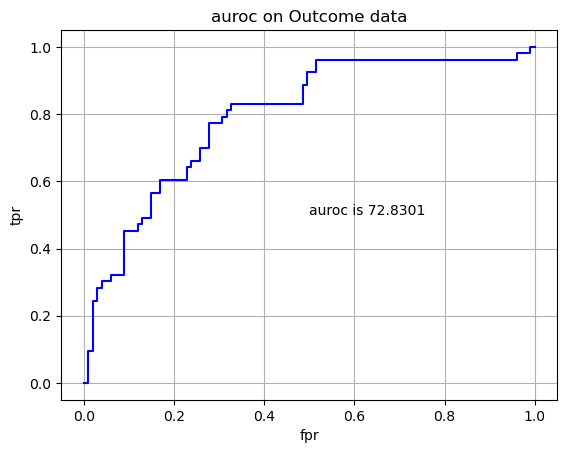

In [26]:
plt.plot(fpr,tpr,color="b")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('auroc on Outcome data')
plt.grid()
plt.text(x=.5,y=.5,s='auroc is 72.8301')

#### The model achieves an accuracy of 82% and a precision of 80%, indicating good overall performance and reliable identification of diabetic cases. However, with a recall of 62%, there's potential to improve the model's ability to capture all instances of diabetes.